#作業6
請依附檔(StudentsPerformance.csv)進行以下分析，並說明分析結果。１.請分析中數學成績(math_score)、閱讀成績(reading_score)與寫作成績(writing_score)之相關性。2.請比較分析男女同學數學成績(math_score)、閱讀成績(reading_score)與寫作成績(writing_score)之差異。3.請比較分析不同group同學數學成績(math_score)、閱讀成績(reading_score)與寫作成績(writing_score)之差異。

#1.請分析中數學成績(math_score)、閱讀成績(reading_score)與寫作成績(writing_score)之相關性。

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
data=pd.read_csv('StudentsPerformance.csv',encoding = "Big5")

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#第五題 皮爾森相關分析
qu=['math score','reading score','writing score']
len(qu)
from scipy import stats
name=[]
alist=[]
pvlist=[]
for i in range(len(qu)):
  #取qu變數與PTS做皮爾森相關分析，a為相關係數，pv為P值
  (a,pv)=stats.pearsonr(data['math score'],data[qu[i]]) 
  name.append(qu[i])
  alist.append(a)
  pvlist.append(pv)
pd.set_option('display.float_format',lambda x:'%.5f'%x)
#資料結構以DataFrame顯示 
#語法:pd.DataFrame(資料,index名稱,columns名稱)
result=pd.DataFrame(alist,name,columns=['相關係數'])
#將pvlist加進result第二欄
result.insert(1,'p-value',pvlist) 
result

,相關係數,p-value
math score,1.00000,0.00000
reading score,0.81758,0.00000
writing score,0.80264,0.00000


由上述結果得知:'math score','reading score','writing score'具有高相關性

#2.請比較分析男女同學數學成績(math_score)、閱讀成績(reading_score)與寫作成績(writing_score)之差異。

In [ ]:
qv=['math score','reading score','writing score']

In [ ]:
name=[]
alist=[]
pvlist=[]
for i in range(len(qv)):
  #分別取t_test變數與 gender='male' 及 gender='female'的交集去做t檢定
  (a,pv)=stats.ttest_ind(data[qv[i]][data['gender']=='female'],data[qv[i]][data['gender']=='male'])
  #將t_test項目加進name中
  name.append(qv[i])
  #將a(t值)加進alist中
  alist.append(a)
  #將pv值加進pvlist中
  pvlist.append(pv)

In [ ]:
#lambda表示式是一種效能比較好的迴圈,跑比較快
pd.set_option('display.float_format',lambda x:'%.2f'%x)
#將alist資料結構用DataFrame顯示出
result=pd.DataFrame(alist,name,columns=['t-value'])
#將pvlist加進result第二欄
result.insert(1,'p-value',pvlist)
result

,t-value,p-value
math score,-5.38,0.00
reading score,7.96,0.00
writing score,9.98,0.00


In [ ]:
data_mean = data.groupby('gender').mean()
data_size = pd.DataFrame(data.groupby('gender').size(),columns=['人數'])
res = pd.concat([data_size,data_mean], axis=1)
res

,人數,math score,reading score,writing score
gender,,,,
female,518,63.63,72.61,72.47
male,482,68.73,65.47,63.31


In [ ]:
data_mean.T#將上面的表格轉向

gender,female,male
math score,63.63320,68.72822
reading score,72.60811,65.47303
writing score,72.46718,63.31120


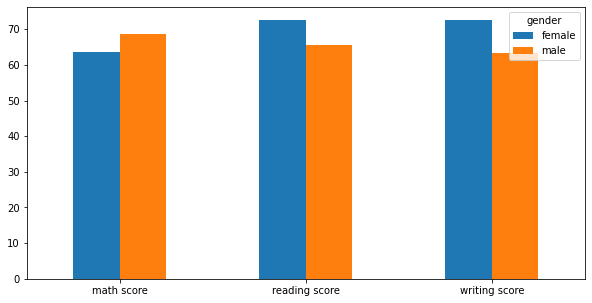

In [ ]:
data_mean.T.plot.bar(rot=0)

由上述結果得知:使用T檢定分析 男女在三項數據皆超出拒絕域 所以
拒絕H(0) 具有明顯差異

#3.請比較分析不同group同學數學成績(math_score)、閱讀成績(reading_score)與寫作成績(writing_score)之差異。

In [ ]:
one=['math score', 'reading score','writing score']
name2=[]
alist2=[] #f值
pvlist2=[] #p值
for i in range(len(one)):
  (a2,pv2)=stats.f_oneway(data[one[i]][data['race/ethnicity']=='group B'],
              data[one[i]][data['race/ethnicity']=='group C'],
              data[one[i]][data['race/ethnicity']=='group A'],
              data[one[i]][data['race/ethnicity']=='group D'],
              data[one[i]][data['race/ethnicity']=='group E'])
  name2.append(one[i])#分析的資料名稱
  alist2.append(a2)
  pvlist2.append(pv2) 

In [ ]:
result2=pd.DataFrame(alist2,name2,columns=['F_value'])
result2.insert(1,'p-value',pvlist2)#插入在1後面,名稱叫p_value;p越小差異越明顯
result2

,F_value,p-value
math score,14.59,0.00
reading score,5.62,0.00
writing score,7.16,0.00


In [ ]:
data_race_mean = data.groupby('race/ethnicity').mean()
data_race_size = pd.DataFrame(data.groupby('race/ethnicity').size(),columns=['人數'])
res1 = pd.concat([data_race_size,data_race_mean], axis=1)
res1

,人數,math score,reading score,writing score
race/ethnicity,,,,
group A,89,61.63,64.67,62.67
group B,190,63.45,67.35,65.60
group C,319,64.46,69.10,67.83
group D,262,67.36,70.03,70.15
group E,140,73.82,73.03,71.41


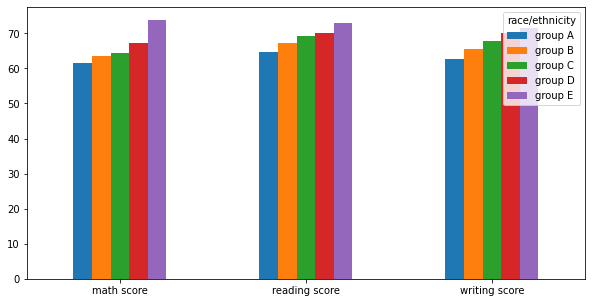

In [ ]:
data_race_mean.T.plot.bar(rot=0)

由上述結果得知:使用變異數分析 group同學在三項數據中 p-value皆小於0.05所以拒絕H(0)   數據具有明顯差異